In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import shap
import graphviz

In [25]:
# Load Dataset
data = pd.read_csv('../2 - Data/develop.csv')  # Replace with the path to your dataset
target = 'Ins'  # Set the target column

In [26]:

X = data.drop(columns=[target])
y = data[target] 

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Encode categorical features
def encode_features(X):
    for column in X.columns:
        if X[column].dtype == 'object':
            X[column] = LabelEncoder().fit_transform(X[column])
    return X

# Load data and define target
data = pd.read_csv('../2 - Data/develop.csv')  # Adjust path as needed
target = 'Ins'

# Separate features and target
X = data.drop(columns=[target])
y = data[target]

# Encode features
X = encode_features(X)

# Handle missing values (if any)
X.fillna(X.median(), inplace=True)

# Calculate correlation with the target
correlations = X.corrwith(y)

# Select features with high correlation
relevant_features = correlations[correlations.abs() > 0.18].index
X = X[relevant_features]

# Ensure the resulting feature set is not empty
if X.empty:
    print("No features have a correlation above the threshold.")
else:
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Initialize and train the Decision Tree model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
# Predict on test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"AUC Score: {auc_score:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.670
AUC Score: 0.585

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      4218
           1       0.54      0.33      0.41      2235

    accuracy                           0.67      6453
   macro avg       0.62      0.59      0.59      6453
weighted avg       0.65      0.67      0.65      6453

Confusion Matrix:
[[3577  641]
 [1491  744]]


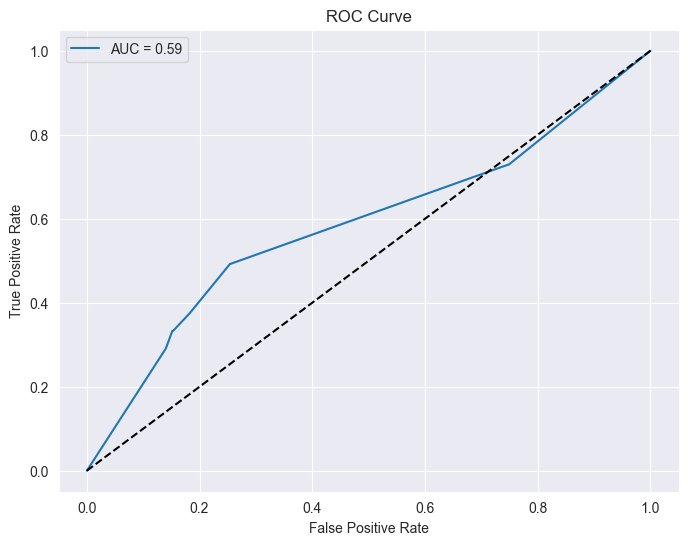

In [31]:
# Import required libraries
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

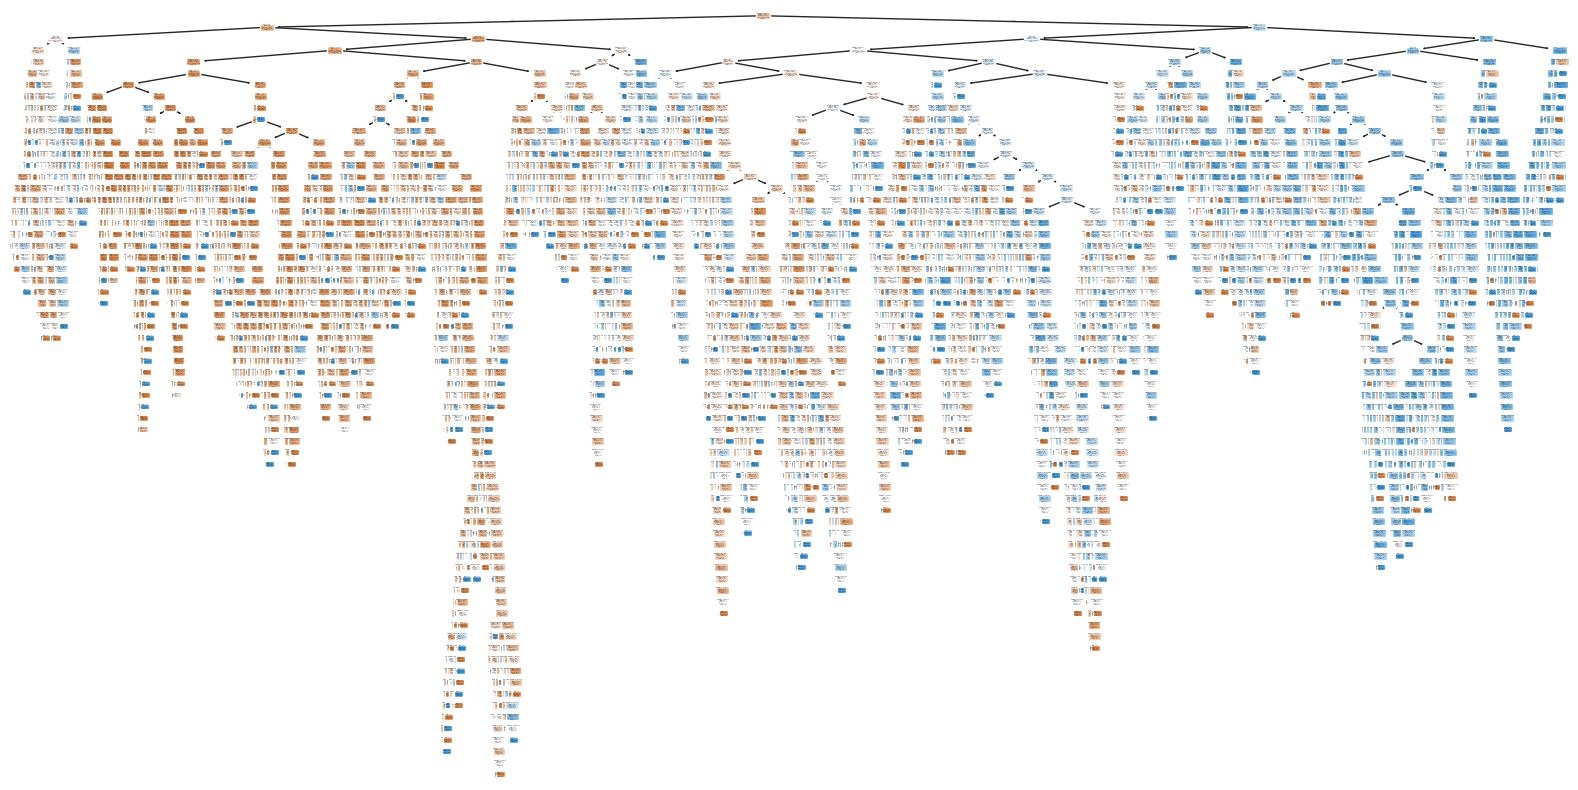

In [32]:
# Import required libraries
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

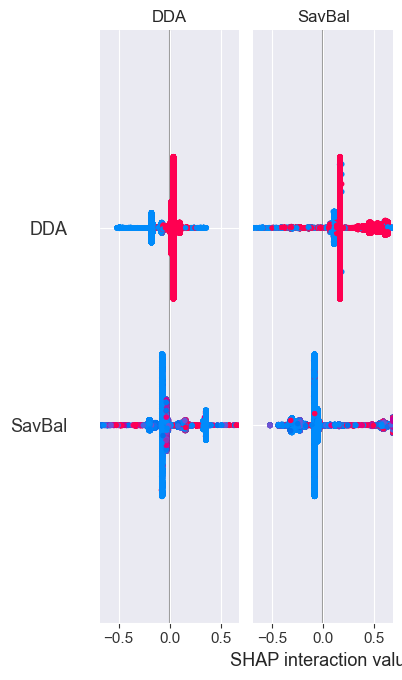

In [33]:
# Import SHAP library
import shap

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")